In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# Introducción a las convnets: Clasificando números



Vamos a echarle un vistazo a un ejemplo sencillo de una convnet. La utilizaremos para clasificar el dataset MNIST, que es un dataset abierto que contiene números escritos a mano. 

![Números escritos a mano del dataset MNIST](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

Vamos a crear una primera convnet basica. Es una pila de capas `Conv2D` y `MaxPooling2D`. 
Lo importante es notar que una convnet toma como input tensores de tamaño `(altura_imagen, anchura_imagen, canales_imagen)`. 
Para ello primero hay que averiguar el tamaño de las imágenes de nuestro dataset. 

La red debe tener las siguientes capas:

- Una capa convolucional (`Conv2D`) con 32 filtros de 3x3 y activación relu. En esta primera capa deberás indicar el tamaño del input (`input_shape`).
- Una segunda capa de Max Pooling (`MaxPooling2D`) de 2x2
- Una tercera capa convolucional con 64 filtros de 3x3 y activación relu
- Una cuarta capa de Max Pooling (`MaxPooling2D`) de 2x2
- Una quinta capa convolucional de 64 filtros de 3x3 y activación relu

Sabrás que lo has hecho bien cuando el output de `model.summary()` sea:

![imagen_output.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output.png?raw=true)


In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), 
                        activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Puedes ver arriba que la salida de cada capa `Conv2D` y `MaxPooling2D` es un tensor 3D de dimensiones `(altura, anchura, canales)`. La anchura y la altura tienden a diminuir según vamos yendo mas profundo en la red. El número de canales está controlado por el primer argumento que se le pasa a 
las capas `Conv2D`  (e.j. 32 o 64).

El siguiente paso sería darle nuestro ultimo tensor (de dimensiones `(3, 3, 64)`) como entrada a una red densamente conectada. 
Estos clasificadores procesan vectores, que son 1D,  mientras que nuestra salida es un tensor 3D. 
Así que primero tendremos que aplanar nuestra salida 3D y convertirla en 1D y después añadir unas cuantas capas densas:

- Primero aplana la salida (`flatten()`)
- Añade una primera capa de 64 neuronas y activación relu
- Añade una última capa de 10 neuronas (tantas como números puedes clasificar) y activación `softmax`

Sabrás que lo has hecho bien cuando el `summary` tenga esta pinta:

![imagen_output_flat.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output_flat.png?raw=true)

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

Queremos clasificar 10 categorías, lo que significa que nuestra capa final debe tener 10 nodos y una función de activación `softmax`.  
Vamos a ver que pinta tiene nuestra red:

Como puedes ver, nuestra salida de dimension `(3, 3, 64)` han sido aplanadas hasta convertirse en vectores de dimensión `(576,)`, antes de entrar en las dos capas densas.

Vamos ahora a entrenar nuestra red con las imágenes del dataset MNIST.

Leemos a continuación el dataset y lo metemos dentro de vectores: `train_images`, `train_labels`, `test_images`, `test_labels`.

Antes de continuar, imprime:

- ¿Cual es el tamaño del dataset de training?
- ¿Qué pinta tiene el dataset de training?
- ¿Qué pinta tienen las etiquetas de training?
- Imprime la cuarta imagen del dataset de training


In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('El tamaño del dataset de training es: {}'.format(train_images.shape))
print('El tamaño de las etiquetas de training es: {}'.format(train_labels.shape))
print('El tamaño del dataset de test es: {}'.format(test_images.shape))
print('El tamaño de las etiquetas de test es: {}'.format(test_labels.shape))
#print(train_images[1])
print('Primeras etiquetas de training: {}'.format(train_labels[0:10]))
print('Cuarta imagen del dataset de training:')
# Le quitamos los bordes para que sea vea bien
print(train_images[4, :, 5:22])

El tamaño del dataset de training es: (60000, 28, 28)
El tamaño de las etiquetas de training es: (60000,)
El tamaño del dataset de test es: (10000, 28, 28)
El tamaño de las etiquetas de test es: (10000,)
Primeras etiquetas de training: [5 0 4 1 9 2 1 3 1 4]
Cuarta imagen del dataset de training:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0]
 [  0   0   0   0   0   0  87 232 252 253 189 210 252 252 253 168   0]
 [  0   0   0   0   4  57 242 252 190  65   5  12 182 252 253 11

A continuación vas a darle la forma adecuada a los datasets de training y test para poder meterlos a la red neuronal.  
Pasa las labels, que ahora mismo son números, a su forma categórica.

In [5]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Compila el modelo indicando cuales son los datos de entrenamiento y sus etiquetas.  
Utilizando el optimizador `rmsprop` y como loss function usa la entropía cruzada categórica.  
Entrena después el modelo durante 5 épocas y un tamaño de batch de 64.

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'],)
model.fit(x=train_images, y=train_labels, batch_size=64, epochs=5, verbose=2)

Epoch 1/5
 - 50s - loss: 0.1693 - acc: 0.9472
Epoch 2/5
 - 49s - loss: 0.0452 - acc: 0.9865
Epoch 3/5
 - 50s - loss: 0.0317 - acc: 0.9903
Epoch 4/5
 - 49s - loss: 0.0241 - acc: 0.9927
Epoch 5/5
 - 48s - loss: 0.0188 - acc: 0.9943


Vamos a evaluar el modelo con las imágenes de test:

In [7]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)

10000/10000 [==============================] - 5s 534us/step


Imprime la accuracy del test que acabas de realizar:

In [8]:
print('Con el conjunto de test, las perdidas son {0}, y el accuracy {1}'.format(test_loss, test_acc))

Con el conjunto de test, las perdidas son 0.027360675163345786, y el accuracy 0.992


In [9]:
model.save('net_numbers.h5')

Carga el modelo que acabas de guardar (`load`).

In [10]:
from keras.models import load_model
model1 = load_model('net_numbers.h5')

Crea una imagen con un número escrito a mano.  
Haz una predicción (`predict_classes`) con la imágen del número que acabas de escribir.  
Prueba con unos cuantos números... ¿Lo hace bien?

Cargamos números dibujados a mano en el ordenador:

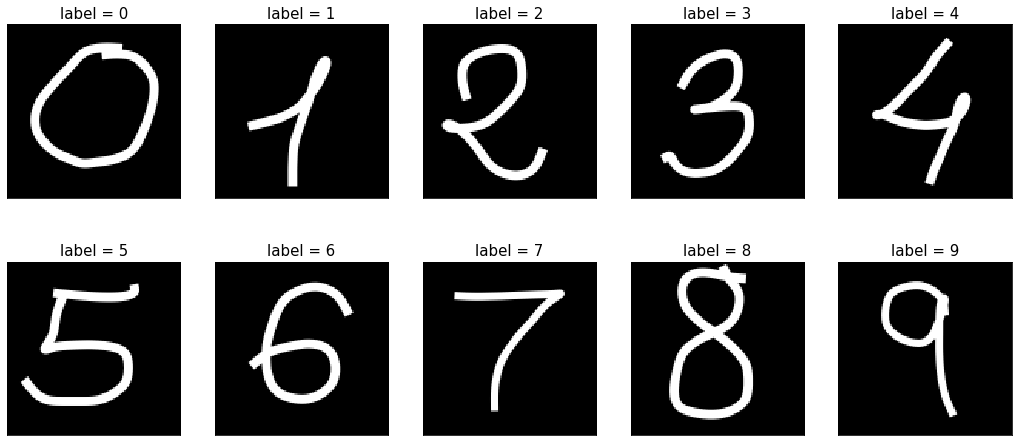

In [11]:
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 5)
fig.set_size_inches(18, 8)
for idx, ax in enumerate(axes.ravel()):
    img = image.load_img('test_numbers/{}.png'.format(idx), color_mode="grayscale")
    ax.imshow(img)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title('label = {}'.format(idx), fontsize=15)
plt.show()

In [12]:
img_width = 28
img_height = 28

for i in range(0,10):
    img = image.load_img('test_numbers/{}.png'.format(i), target_size=(img_width, img_height), color_mode="grayscale")
    x = image.img_to_array(img)
    x = np.expand_dims(x/255, axis=0)
    print('Para la imagen {}, se ha predicho un {}'.format(i, model1.predict_classes(x)[0]))

Para la imagen 0, se ha predicho un 0
Para la imagen 1, se ha predicho un 1
Para la imagen 2, se ha predicho un 2
Para la imagen 3, se ha predicho un 3
Para la imagen 4, se ha predicho un 4
Para la imagen 5, se ha predicho un 5
Para la imagen 6, se ha predicho un 6
Para la imagen 7, se ha predicho un 7
Para la imagen 8, se ha predicho un 8
Para la imagen 9, se ha predicho un 9


Sin embargo, si usamos un `7` con un trazo horizontal en el medio, o un `9` con el loop un poco más grande que los de train:

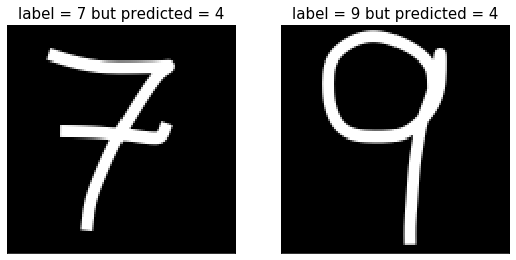

In [13]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(9, 8)
paths = [7, 9]
for idx, ax in enumerate(axes.ravel()):
    img = image.load_img('./test_numbers/{}_other.png'.format(paths[idx]), color_mode="grayscale")
    ax.imshow(img)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    img = image.load_img('./test_numbers/{}_other.png'.format(paths[idx]), 
                         target_size=(img_width, img_height), color_mode="grayscale")
    x = image.img_to_array(img)
    x = np.expand_dims(x/255, axis=0)
    ax.set_title('label = {} but predicted = {}'.format(paths[idx], model1.predict_classes(x)[0]), fontsize=15)
plt.show()